In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('practice..csv')

In [5]:
df.head()

,Unnamed: 0,input_1,input_2,output
0,0,-0.158986,0.423977,1.0
1,1,-0.347926,0.470760,1.0
2,2,-0.504608,0.353801,1.0
3,3,-0.596774,0.114035,1.0
4,4,-0.518433,-0.172515,1.0


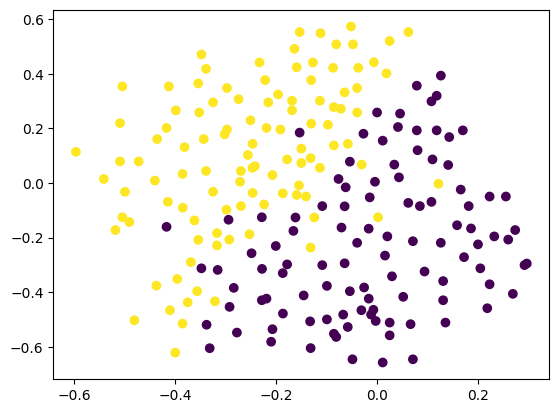

In [11]:
plt.scatter(x=df['input_1'],y=df['input_2'],c=df['output'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input

In [15]:
model_1 = Sequential([
    Input(shape=(2,)),
    Dense(5,activation='sigmoid'),
    Dense(5,activation='sigmoid'),
    Dense(1,activation='sigmoid')
])
# using sigmoid function in all hidden layers and arctucture is [2'5'5'1]

In [16]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Set parameters to 0
model_1.get_weights()[5]

array([0.], dtype=float32)

In [20]:
initial_weights = model_1.get_weights()

In [27]:
initial_weights[0] = np.zeros(model_1.get_weights()[0].shape)
initial_weights[1] = np.zeros(model_1.get_weights()[1].shape)
initial_weights[2] = np.zeros(model_1.get_weights()[2].shape)
initial_weights[3] = np.zeros(model_1.get_weights()[3].shape)
initial_weights[4] = np.zeros(model_1.get_weights()[4].shape)
initial_weights[5] = np.zeros(model_1.get_weights()[5].shape)

In [28]:
initial_weights

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0.]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0.]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([0.])]

In [29]:
model_1.set_weights(initial_weights)

In [30]:
model_1.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
#history = model_1.fit(X,y,epochs=10,validation_split=0.2)

In [39]:
#model_1.get_weights()

In [38]:
from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X,y.astype('int'), clf=model_1, legend=2)

In [37]:
#by using relu activation function same with tanh no cahges occer in trainable parameters

model_2 = Sequential([
    Input(shape=(2,)),
    Dense(5,activation='relu'),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [54]:
model_3= Sequential([
    Input(shape=(2,)),
    Dense(5,activation='tanh'),
    Dense(5,activation='tanh'),
    Dense(1,activation='sigmoid')
])

In [49]:
#model_2.get_weights()

In [45]:
#initial_weights

In [47]:
model_2.set_weights(initial_weights)

In [55]:
model_3.set_weights(initial_weights)

In [50]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
#history = model_2.fit(X,y,epochs=20,validation_split=0.2)

In [58]:
history = model_3.fit(X,y,epochs=20,validation_split=0.2)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4345 - loss: 0.6932 - val_accuracy: 0.3953 - val_loss: 0.6933
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5298 - loss: 0.6931 - val_accuracy: 0.3953 - val_loss: 0.6934
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5298 - loss: 0.6931 - val_accuracy: 0.3953 - val_loss: 0.6935
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5298 - loss: 0.6931 - val_accuracy: 0.3953 - val_loss: 0.6937
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5298 - loss: 0.6930 - val_accuracy: 0.3953 - val_loss: 0.6938
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5298 - loss: 0.6930 - val_accuracy: 0.3953 - val_loss: 0.6939
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5298 - loss: 0.6929 - val_accuracy: 0.3953 - val_loss: 0.6940
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5298 - loss: 0.6929 - val_accuracy: 0.3953 - val_loss: 0.6943


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

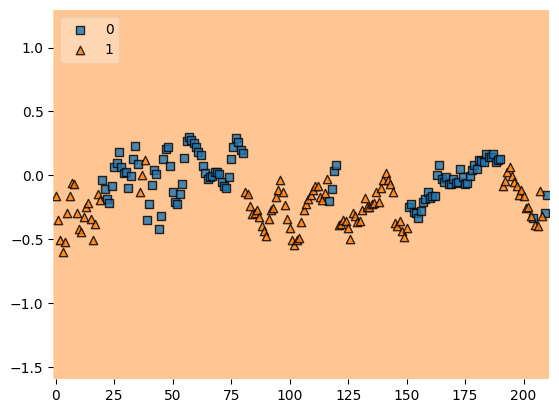

In [52]:
plot_decision_regions(X,y.astype('int'), clf=model_2, legend=2)

In [53]:
model_2.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.02746019], dtype=float32)]

In [59]:
model_3.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.02751413], dtype=float32)]